> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The No Show appointment data collected and selected is based on a 100K observation done in Brazil with the target (Dependent) variable showing if a particular patient returned to the hospital or not. It includes several features as columns that are relevant to the dependent variable.
The columns include the following:
* `Neighbourhood:` This details the loacation of the observed patient
* `Scholarship:` Which shows whether the patient is in the Brazillian welfarism program.
* `Schedule Day:` The day of their appointmemnt
* `Gender:` Male or Female.
* `Age:` The age of observed individual.
* And columns that describe the various common diseases such as diabetes, Hypertension.
* `sms_received:` which shows if patient got or did not get a sms 
* Dependent Variable column (No Show column): This signals that NO means that the particular observed patient returned and YES shows that they did no return.


### Question(s) for Analysis

>- Do more male show for appointments than female appointments
>- Which age turn up the most and which age have the least turn up.
>- What day of the week produces the highest appointment (Weekend or weekdays?)
>- Does scholarship determines if an observed patient would go for another appointment. Also what percentage of male or female received scholarship and did it affect the gender in returning for an appointment.
>- Which neighbourhood receives the most scholarship and which neighbourhood comes back most for reappointments.
>- General type of disease common for those that returned
>- Do sms recepient have associated possibility of coming back for another appointment

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlineBackend = "retina"

In [167]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.
 

In [168]:
#loading data into workspace

df = pd.read_csv ("./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [169]:
#Check shape of data
df.shape

(110527, 14)

Obatain the number of unique patientId and AppointmentID. If the number of unique IDs in any case is the number of the rows, this means we can drop the column(s) because the index of the dataframe is enough for indexing. 

If it is not so, we want to check for duplicate cells and determine if we want to remove the duplicates.

In [170]:
print("The number of unique appointment ID is", df["AppointmentID"].nunique())
print("The number of unique patient ID is", df["PatientId"].nunique())

The number of unique appointment ID is 110527
The number of unique patient ID is 62299


Let us drop the AppointmentID column.

Since we have only 62,299 patients record, this shows that some IDs are duplicate, we need to see if they are actual duplicates and decide on how to deal with them.

In [171]:
#dropping appointmentId
df.drop("AppointmentID", axis = 1, inplace = True)

In [172]:
df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [173]:
#Sum of actual duplicates
sum(df.duplicated())

618

In order to check for actual duplicates, let us clean the appointmentday column and ScheduledDay column. Before that let us rename the columns

In [174]:
df = df.rename(columns = lambda x: x.strip().lower().replace("-", "_")) #strip, lower case and replace dash with underscore

In [175]:
#Check for result
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [176]:
#A copy of the actual data incase something gets deprecated
df1 = df.copy()

In [177]:
#Renaming columns
for c in df.columns:
    if "day" in c:
        df.rename(columns = {c: c[:-3] + "_" + c[-3:]}, inplace = True)
    elif "id" in c:
        df.rename(columns = {c: c[:-2] + "_" + c[-2:]}, inplace = True)
    elif c == "hipertension":
        df.rename(columns = {c: "hypertension"}, inplace = True)
    elif c == "handcap":
        df.rename(columns = {c: "handicap"}, inplace = True)

In [178]:
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Having Cleaned the column names, we can now check to clean the scheduled day and appointment day values.

In [179]:
#check to see the sttructure of the values recorded in the scheduled day column

df["scheduled_day"].value_counts().head(5)

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
Name: scheduled_day, dtype: int64

In [181]:
#Cleaning the scheduled day and appointment day column using the apply function
#Create copy for testing and avoidng deperecation

df1 = df.copy()

#define function to apply to both columns
def day_cleaner(x):
    ''' A function to select the  first 10 characters.
    Useful for when want to extract the first 10 characters that
    are actual date format an the remaining string is 
    irrelevant.
    '''
    return x[:10]

df["scheduled_day"] = df["scheduled_day"].apply(day_cleaner) #Apply function daya cleaner to respective colummns
df["appointment_day"] = df["appointment_day"].apply(day_cleaner)

In [182]:
#Print samples of appointment day and scheduled day
#to verify that the code above worked as desired

print(df["scheduled_day"].head(1))
df["appointment_day"].sample(1)

0    2016-04-29
Name: scheduled_day, dtype: object


46852    2016-05-30
Name: appointment_day, dtype: object

In [183]:
#After cleaning the appointment and scheduled day column which seems to be the same thing,
#lets us check amount of dupliacted columns 

sum(df.duplicated())

4222

In [184]:
#Let us verify first that appointment and scheduled  day columns are the same

sum(df["appointment_day"] == df["scheduled_day"])

38563

From the above information, it appears that the scheduled day and appointment days are different and it makes sense to tag the scheduled day as the day when the appointment was given. Thus in a future feature engineering process, this information could prove useful.

In [185]:
#Let us drop duplicates while keeping the last row for each duplicate sample.

df.drop_duplicates(keep = "last", inplace = True)

In [186]:
df.shape

(106305, 13)

In [187]:
#Check the information concerning data types of each columns and general infromative and desctriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106305 entries, 3 to 110526
Data columns (total 13 columns):
patient_id         106305 non-null float64
gender             106305 non-null object
scheduled_day      106305 non-null object
appointment_day    106305 non-null object
age                106305 non-null int64
neighbourhood      106305 non-null object
scholarship        106305 non-null int64
hypertension       106305 non-null int64
diabetes           106305 non-null int64
alcoholism         106305 non-null int64
handicap           106305 non-null int64
sms_received       106305 non-null int64
no_show            106305 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.4+ MB


In [188]:
#Convert patient_id column to object

df["patient_id"] =  df["patient_id"].astype(int).astype(str)

In [189]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,106305.000000,106305.000000,106305.000000,106305.000000,106305.000000,106305.000000,106305.000000
mean,37.116128,0.098067,0.198946,0.072744,0.027986,0.021890,0.333700
std,23.173480,0.297406,0.399210,0.259716,0.164932,0.160314,0.471536
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [190]:
df.describe(include = "object")

,patient_id,gender,scheduled_day,appointment_day,neighbourhood,no_show
count,106305,106305,106305,106305,106305,106305
unique,62299,2,111,27,81,2
top,1484143378533,F,2016-05-03,2016-06-06,JARDIM CAMBURI,No
freq,35,69588,4086,4545,7413,84615


From the description of the dataset. some notable features would be:
* The predence of -1 as the minimum age, which has to be an errror.
* The handicap column having 4 as the maximum number where we were expecting a binary 0 and 1 value entry
* There is only 62299 unique patients(id).
* There are more females than males in the dataset.
* More people generally showed up than did not.

In [191]:
#Check df for handicap column
#It contains several values apart from anticipated 0 and 1

df["handicap"].value_counts()

0    104186
1      1928
2       177
3        11
4         3
Name: handicap, dtype: int64

The value counts of the handicapped column seen above shows that the recording of the handicap column is different from the conventional 0(No) and 1(Yes). 
This could also be a mistake in data entry. Only more information can explain further.

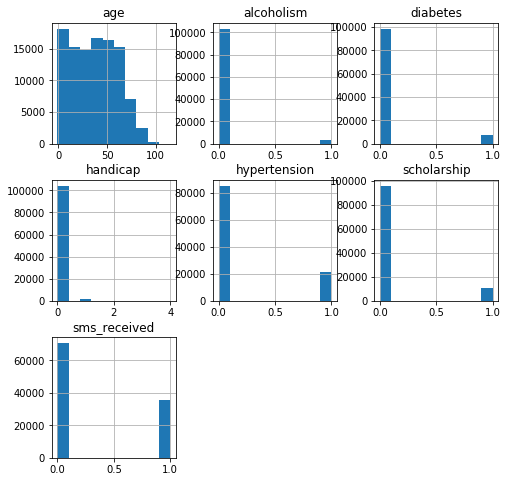

In [192]:
#Check the distribution of the features of the dataframe

df.hist(figsize = (8, 8));

In [193]:
#Drop data values of age equal to -1, which is an invalid entry for age.

row_drop = df[df["age"] == -1]
df.drop(list(row_drop.index), inplace = True)

In [195]:
#Print value counts of age column and sort by the index
#i.e. age
df.age.value_counts().sort_index().head()

0    3448
1    2211
2    1579
3    1467
4    1265
Name: age, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Question(s) for Analysis

>- Do more male show for appointments than female appointments
>- Which age turn up the most and which age have the least turn up.
>- What day of the week produces the highest appointment (Weekend or weekdays?)
>- Does scholarship determines if an observed patient would go for another appointment. Also what percentage of male or female received scholarship and did it affect the gender in returning for an appointment.
>- Which neighbourhood receives the most scholarship and which neighbourhood comes back most for reappointments.
>- General type of disease common for those that returned
>- Do sms recepient have associated possibility of coming back for another appointment


### Research Question 1 (Do More Male show up for appointments than females?)

This is to determine whether more male or more females report for appointment

In [196]:
#Create a df for people that showed up for their appointments

show_df = df.drop_duplicates(["patient_id"], keep = "last").query('no_show == "No"')
show_df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
4,8841186448183,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
8,56394729949972,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No
10,734536231958495,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No
12,566654781423437,F,2016-04-28,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No


The number of male and female that go for appointments, 
 F    32216
M    17861
Name: gender, dtype: int64


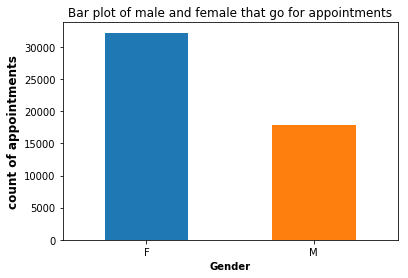

In [197]:
print("The number of male and female that go for appointments, \n", show_df.drop_duplicates(subset = ["patient_id"])["gender"].value_counts())

show_df.drop_duplicates(subset = ["patient_id"])["gender"].value_counts().plot(kind = "bar", rot = 0)
plt.xlabel("Gender", fontsize = 10, weight = "bold")
plt.ylabel("count of appointments", fontsize = 12, weight = "bold")
plt.title("Bar plot of male and female that go for appointments");

**Insights:** Generally more female go for appointments than male. However to obtain a more accurate information, let us plot the proportion of male and proportion of female instead.

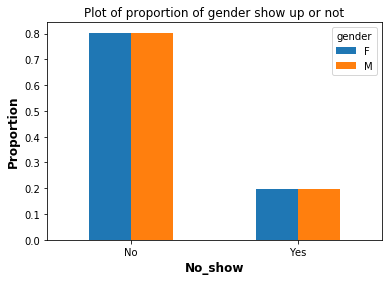

In [202]:
#Groupby the gender column and subset by no_show column

patient_df = df.drop_duplicates(subset = ["patient_id"])  #Obtain df for only each patient

patient_df.groupby("gender")["no_show"].value_counts(normalize = True).unstack("gender").plot(kind = "bar", rot = 0)
plt.title("Plot of proportion of gender show up or not")
plt.xlabel("No_show", fontsize = 12, weight = "bold")
plt.ylabel("Proportion", fontsize = "12", weight = "bold");

- Interestingly, by proportion of individual genders, there is not so much difference on the gender that shows more turn up for appointments.
- The initial difference in the gender that go for appointments is because females are more in the record(40,045) (i.e. were appointees) than males(22,253). Females almost doubled the number of males in the record.

### Research Question 1b:  (Does scholarship determines if an observed patient would go for another appointment. Also what percentage of male or female received scholarship and did it affect the gender in returning for an appointment?)

To further explore the data and possible relationship between the gender and the scholarship received

In [203]:
#Obtain df for those that received scholarship
scholarship_df = df.query('scholarship == 1')

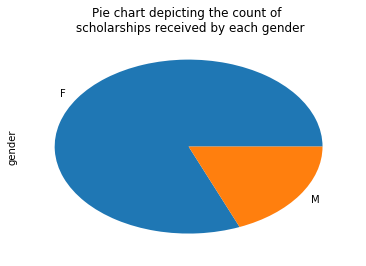

In [204]:
#Make plot of the gender and count of scholarships received by each gender

scholarship_df.drop_duplicates(subset = ["patient_id"])["gender"].value_counts().plot(kind = "pie") #Drop duplicates to obtain just one person per record
plt.title("Pie chart depicting the count of \n scholarships received by each gender");

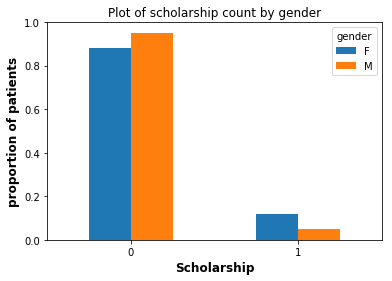

In [206]:
patient_df.groupby("gender")["scholarship"].value_counts(normalize = True).unstack("gender").plot(kind = "bar", rot = 0)
plt.title("Plot of scholarship count by gender")
plt.xlabel("Scholarship", fontsize = 12, weight = "bold")
plt.ylabel("proportion of patients", fontsize = 12, weight = "bold");

By proportion, more females(blue bar) get more scholarships (scholarship = 1) than male conterpart, while more male(orange bar) are without scolarships (scholarship = 0) compared to their female conterparts by proportion

### Question 1c: How does scholarship affect the turn out of patients generally towards appointment?

In [207]:
#To see the turnout of people who receive scholarships to those that don't receive schoalrship
df_per_patient = df.drop_duplicates(["patient_id"], keep = "last") #A general df for each individual patient_id

#define function for counting the show and no show by any category(x)
def show_grouper(dataframe, category):
    return dataframe.groupby(category)["no_show"].value_counts(normalize = True)

scholarship_turnout = show_grouper(df_per_patient, "scholarship") 

scholarship_turnout = scholarship_turnout.unstack("scholarship") #unstasck for making a table wider rather than longer
scholarship_turnout

scholarship,0,1
no_show,,
No,0.806831,0.774534
Yes,0.193169,0.225466


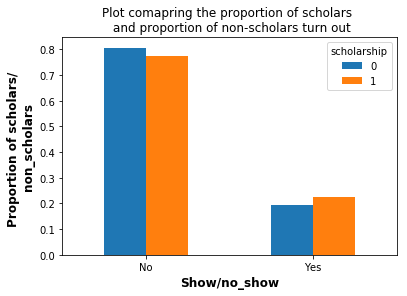

In [209]:
scholarship_turnout.plot(kind = "bar", rot = 0)
plt.title("Plot comapring the proportion of scholars \n and proportion of non-scholars turn out")
plt.xlabel("Show/no_show", fontsize = 12, weight = "bold")
plt.ylabel("Proportion of scholars/ \nnon_scholars", fontsize = 12, weight = "bold");

* Scholarship turnout proportion describes the proportion of scholars and non scholars that showed up or did not show up. 
* I.e. X propoprtion of scholars (out of total scholars) showed up (or not showed up) for appointments (denoted by the blue bars) and Y proportion of non-scholars (out of total non-scholars) showed up or did not show up for the appointment (denoted by orange bars)

In [210]:
#For better translation (using percentage)
sch_prop = scholarship_turnout.iloc[0, 1] #proportion of those who received sch and turned out
no_sch_prop = scholarship_turnout.iloc[0, 0] #proportion of those who didn't receive and turned out

print("The percentage of people that received scholarship and came for the appointment (out of total scholars) is: {:.2f}%".format(sch_prop * 100))
print("The percentage of people that DID NOT receive scholarship but came for the appointment (out of total non-scholars) is: {:.2f}%".format(no_sch_prop * 100))

The percentage of people that received scholarship and came for the appointment (out of total scholars) is: 77.45%
The percentage of people that DID NOT receive scholarship but came for the appointment (out of total non-scholars) is: 80.68%


Although more Females are awarded more schalrships than male. We see that the scholarship is not the real driving force for those that came back for an appointment.
The proportion of those who did not recieve scholarship but came for an appointment is more than those who have a scholarship.
We can however explore the case further to determine which gender takes more serious their scholarship.

### Question 1d: Which gender takes the scholarship more seriously

In [211]:
sch_show = show_df.query('scholarship == 1') #df of those that show up and have a scholarship

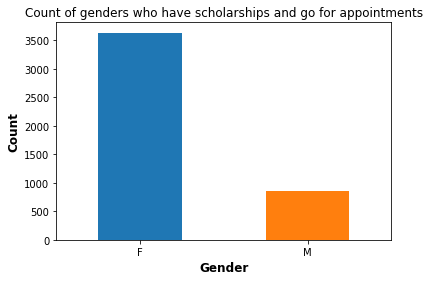

In [212]:
sch_show.groupby("gender").patient_id.count().plot(kind = "bar", rot = 0)
plt.title("Count of genders who have scholarships and go for appointments")
plt.xlabel("Gender", fontsize = 12, weight = "bold")
plt.ylabel("Count", fontsize = 12, weight = "bold");

By raw count, female scholarship beneficiaries generally show up than male beneficiaries. However, observing only raw counts can be mislaeding as the original dataset does not have balance of both genders in terms of data and value entry

In [213]:
#To examine the data by proportion
sch_df = df_per_patient.query('scholarship == 1') #df of those that show up and have a scholarship
sch_df_gender = show_grouper(sch_df, "gender").unstack()

print("The proportion of scholars that go for appointments categorized by gender is given below:")
sch_df_gender.loc[:, "No"]

The proportion of scholars that go for appointments categorized by gender is given below:


gender
F    0.773240
M    0.780129
Name: No, dtype: float64

From the resulting series above, it appears that there is not much difference between the proportion of male and female that go for the appointment and have a scholarship. The male do have a slightly better approach and slightly higher proportion especially their proportion in the data entry.

### Research Question 2  (Which Age has the most and least turnout!)

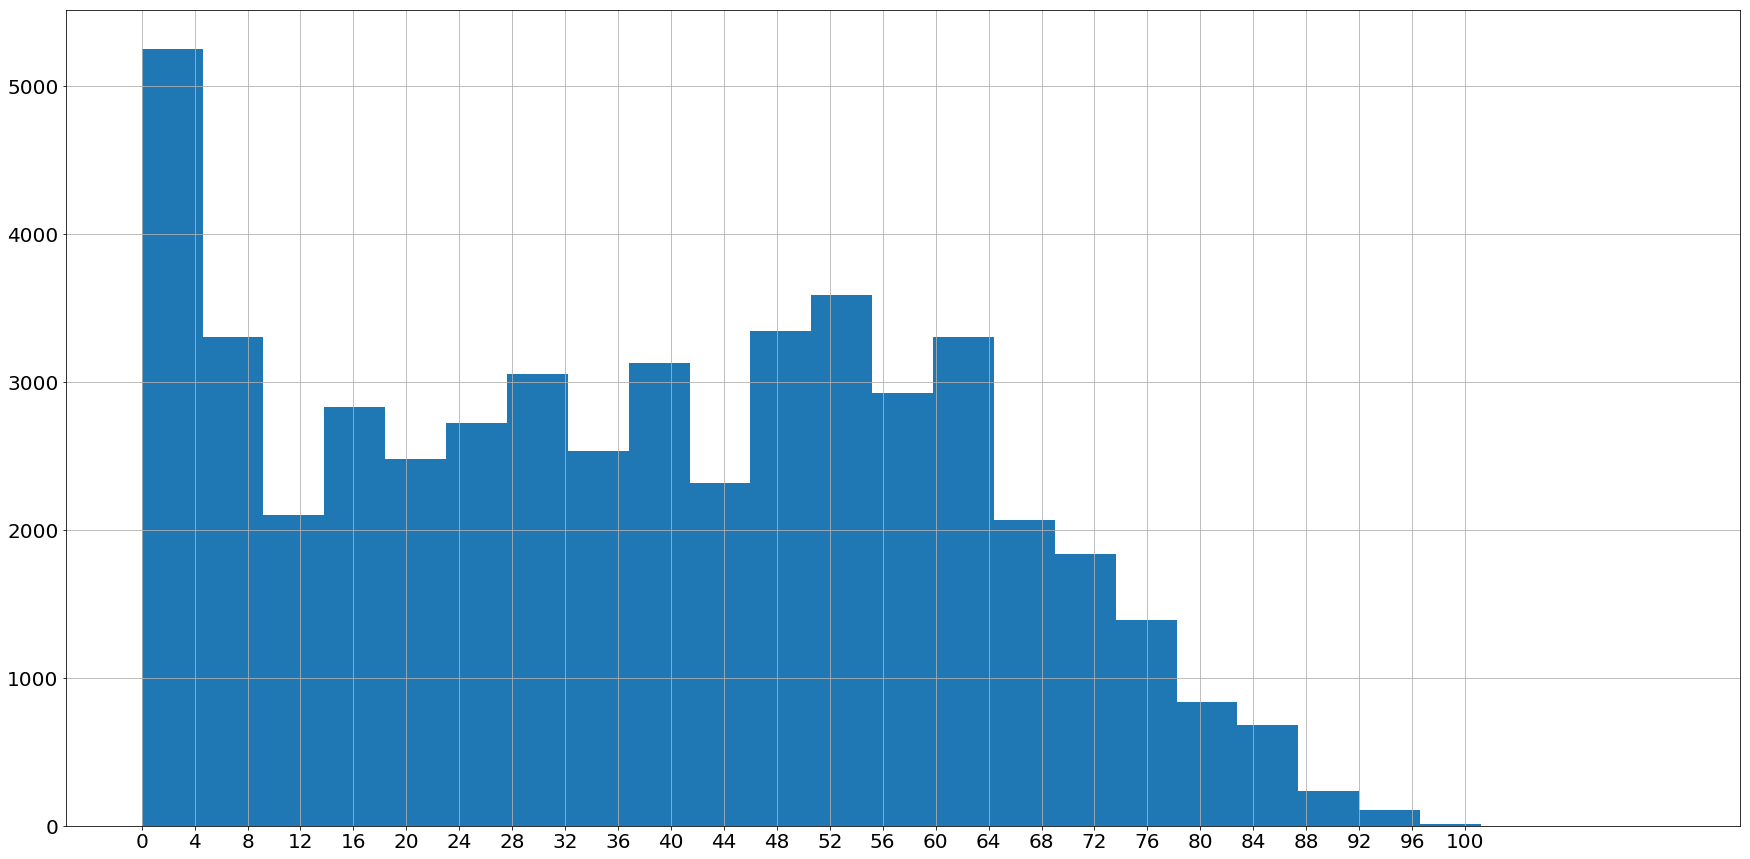

In [214]:
show_df["age"].hist(bins = 25, figsize = (30, 15))
plt.xticks(np.arange(0, 101, 4), rotation = 0, fontsize = 20)
plt.yticks(fontsize = 20);

In [215]:
show_df["age"].describe()

count    50077.000000
mean        37.474250
std         23.828613
min          0.000000
25%         17.000000
50%         38.000000
75%         57.000000
max        115.000000
Name: age, dtype: float64

* The average age of patients that return for appointments is 37 years old with 0 year old (children) having more returning for appointments.
* The highest age is 115 year old, while most of the ages are between 17 to 57 years old.

### Research Question 3  (The features of Hypertension patients.)

In [216]:
#Create hyp_df
hypertension_df = df.query("hypertension == 1")

In [217]:
hypertension_df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,21149.000000,21149.000000,21149.0,21149.000000,21149.000000,21149.000000,21149.000000
mean,60.670717,0.084496,1.0,0.298832,0.056598,0.048324,0.324743
std,13.883610,0.278136,0.0,0.457757,0.231079,0.232035,0.468290
min,4.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,61.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,70.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.0,1.000000,1.000000,3.000000,1.000000


In [218]:
hypertension_df.describe(include = "object")

,patient_id,gender,scheduled_day,appointment_day,neighbourhood,no_show
count,21149,21149,21149,21149,21149,21149
unique,12242,2,98,27,78,2
top,1484143378533,F,2016-05-03,2016-05-02,JARDIM DA PENHA,No
freq,35,14945,863,879,974,17464


The minimum of age of hypertensive patients is 60 years old and median age 61 years old.

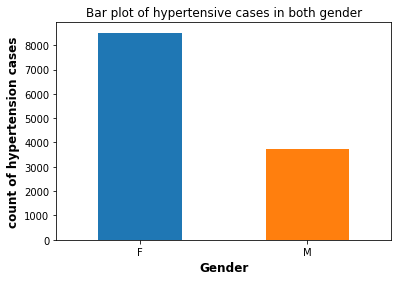

In [219]:
#plot barplot for gender that have hypertension

hypertension_df.drop_duplicates(subset = "patient_id")["gender"].value_counts().plot(kind = "bar", rot = 0)
plt.title("Bar plot of hypertensive cases in both gender")
plt.xlabel("Gender", fontsize = 12, weight = "bold")
plt.ylabel("count of hypertension cases", fontsize = 12, weight = "bold");

In [220]:
hyp_per_gender = patient_df.groupby("gender")["hypertension"].value_counts(normalize = True).unstack()[1]

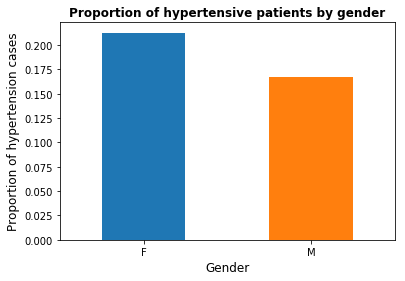

In [221]:
#Plot proportions
hyp_per_gender.plot(kind = "bar", rot = 0)
plt.title("Proportion of hypertensive patients by gender", weight = "bold")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("Proportion of hypertension cases", fontsize = 12);

By proportion females record more hypertensions than males

In [222]:
#The proportion of cases who have hypertension and go back for another appointment

hyp_show = hypertension_df.query('no_show == "No"')
hyp_prop = hyp_show.shape[0] / hypertension_df.shape[0]

print("The proportion of hypertension cases that return for reappointment is {:.2f}%".format(hyp_prop * 100))

The proportion of hypertension cases that return for reappointment is 82.58%


In [223]:
#Proportion of hyp patients that have scholarships and show up
hyp_patients_sch = hypertension_df.drop_duplicates("patient_id").query('no_show == "No" & scholarship == 1')
hyp_patients_sch.shape[0]/hypertension_df.drop_duplicates(subset = "patient_id").shape[0]

0.0628165332462016

In [224]:
hyp_sch_count = hypertension_df.drop_duplicates("patient_id").query('scholarship == 1').shape[0]
hyp_total_count = hypertension_df.drop_duplicates(subset = "patient_id").shape[0]

hyp_sch_prop = hyp_sch_count/hyp_total_count
hyp_sch_prop

0.0793987910472145

6% of hypertensive patients have scholarships and go for appointments while 2% of hypertensive patients who have scholarships did not return for appointments

### QUestion 4: How does the appointment day affects the people that show up

In [225]:
#Feature Engineering process of converting the the date columns to datetime objects

df['appointment_day'] = pd.to_datetime(df["appointment_day"])
df["scheduled_day"] = pd.to_datetime(df["scheduled_day"])

In [226]:
df["appointment_weekday"] = df["appointment_day"].apply(lambda x: x.weekday())

The above column (appointment_weekday) represents each day with the following key:
* 0: Monday
* 1: Tuesday
* 2: Wednesday
* 3: Thursday
* 4: Friday
* 5: Saturday
* 6: Sunday

In [227]:
#cut the weekdays into literal days
df["appointment_days"] = pd.cut(df["appointment_weekday"], bins = [0, 1, 2, 3, 4, 5, 6, 7], labels = ["Monday", 
                                                                          "Tuesday", "Wednesday", "Thursday",
                                                                         "Friday", "Saturday", "Sunday"], right = False)

In [228]:
new_show_df = df.query("no_show == 'No'")
new_noshow_df = df.query("no_show == 'Yes'")

In [229]:
weekday_show = new_show_df["appointment_days"].value_counts()

In [230]:
weekday_noshow = new_noshow_df["appointment_days"].value_counts()

In [231]:
for i, j in enumerate(weekday_show.index):
    print(i, j)

0 Wednesday
1 Tuesday
2 Monday
3 Friday
4 Thursday
5 Saturday
6 Sunday


In [232]:
for i, j in enumerate(weekday_noshow.index):
    print(i, j)

0 Tuesday
1 Wednesday
2 Monday
3 Friday
4 Thursday
5 Saturday
6 Sunday


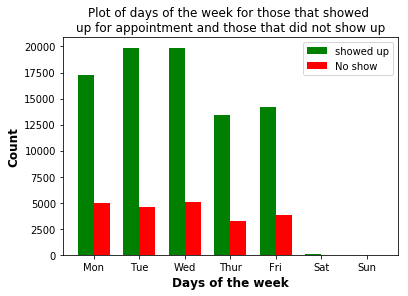

In [233]:
#make a plot comapring the days of the week for those who turned up and those who did not
ind_show = np.array([2, 1, 0, 4, 3, 5, 6])
ind_noshow = np.array([2, 0, 1, 4, 3, 5, 6])
width = 0.35

show_plot = plt.bar(ind_show, weekday_show.values, width, color = "green", label = "showed up")
no_show_plot = plt.bar(ind_noshow + width, weekday_noshow.values, width, color = "red", label = "No show")

plt.title("Plot of days of the week for those that showed \nup for appointment and those that did not show up")
plt.xlabel("Days of the week", fontsize = 12, weight = "bold")
plt.ylabel("Count", fontsize = 12, weight = "bold")
locations = np.array([0, 1, 2, 3, 4, 5, 6]) + width/2
labels = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
plt.xticks(locations, labels, rotation = 0)
plt.legend()
plt.show;

Saturday and Sunday seem to be no appointment made.
    However, Thursday and friday recorded the lowest number of appointments (among the weekdays) made and susbsequently the least show up or no show.

### Question 5: Proportion of people that received the SMS and showed Up

In [234]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_weekday,appointment_days
3,867951213174,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,Friday
4,8841186448183,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,Friday
5,95985133231274,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,4,Friday
6,733688164476661,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,4,Friday
7,3449833394123,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,4,Friday


In [235]:
# the number of people that received sms
prop_show_sms = show_grouper(df, "sms_received").unstack()["No"]
prop_show_sms

sms_received
0    0.831865
1    0.724277
Name: No, dtype: float64

In [236]:
print("The proportion of those who received sms and went for appoinment is {:.2f}%".format(prop_show_sms[1] * 100))

print("The proportion of those who did not receive sms and went for appoinment is {:.2f}%".format(prop_show_sms[0] * 100))

The proportion of those who received sms and went for appoinment is 72.43%
The proportion of those who did not receive sms and went for appoinment is 83.19%


### Diseases Common among Patients

In [237]:
total_diabetes = patient_df["diabetes"].sum()
show_diabetes = show_df["diabetes"].sum()

prop_diabetes_show = show_diabetes/total_diabetes

print("Proportion of diabetic cases that showed up for appointment is {:.2f}".format(prop_diabetes_show * 100))

Proportion of diabetic cases that showed up for appointment is 83.24


In [238]:
total_handicap = patient_df["handicap"].apply(lambda x: 1 if x >= 1 else 0).sum()
show_handicap = show_df["handicap"].apply(lambda x: 1 if x >= 1 else 0).sum() 

#Apply lambda function to change numbers greater than 1 to become 1

prop_handicap_show = show_handicap/total_handicap

print("Proportion of handicap cases that showed up for appointment is {:.2f}".format(prop_handicap_show * 100))

Proportion of handicap cases that showed up for appointment is 85.00


In [239]:
total_hyp = patient_df["hypertension"].sum()
show_hyp = show_df["hypertension"].sum()

prop_hyp_show = show_hyp/total_hyp

print("Proportion of hypertensive cases that showed up for appointment is {:.2f}".format(prop_hyp_show * 100))

Proportion of hypertensive cases that showed up for appointment is 84.03


The three cases of diseases listed above do not really show difference among the kind of patients that show up or not.

### Effect of neighbourhood on appointments

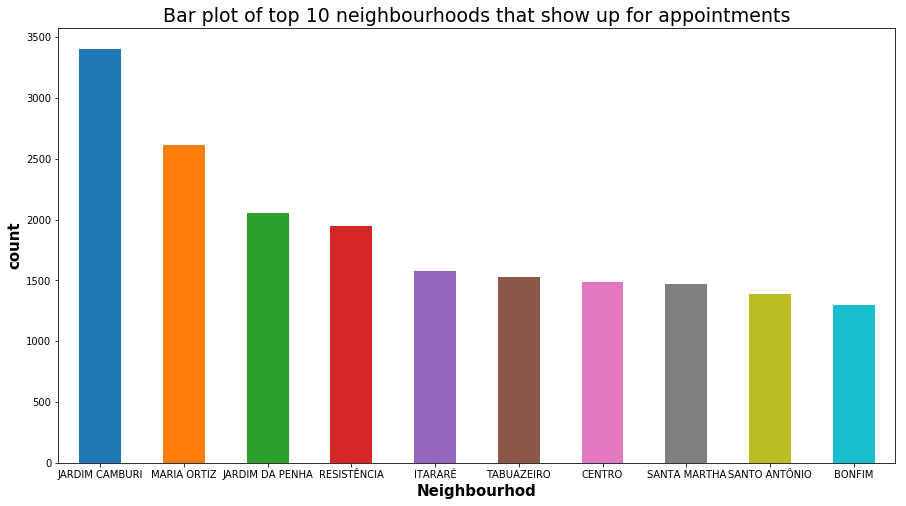

In [240]:
show_df["neighbourhood"].value_counts()[:10].plot(kind = "bar", rot = 0, figsize = (15, 8))
plt.title("Bar plot of top 10 neighbourhoods that show up for appointments", fontsize = 19)
plt.xlabel("Neighbourhod", fontsize = 15, weight = "bold")
plt.ylabel("count", fontsize = 15, weight = "bold");

The top ten neighboiurhood by the number of patient appointments generated from each neighbourhood

<a id='conclusions'></a>
## Conclusions

>- Generally there are more females in the dataset than males and can affect deterministic results.
>- There are no appointments on weekned days.
>-Tuesday and Wednesday happens to be the busiest days of the week for the health center
>- Age 0 to 4 recorded the most appointments among other age ranges.
>- More information can be developed on each category of cases classified by the different cases of diseases.
>- The actual location of the hospital and geographcal coordinates of the different locations present in the dataset could make the diffenece to examine the efffect of distance on those who came for appointments and thsoe who did not.
>- The top neighbourhood that has turned out for appointments is Jardim Camburi

### Limitations
>- The sampling method has more females than males
>- Although we see a higher percentage around those who did not receive SMS and showwed up, the lack of further information and further experimentation about the selection criteria of those chosen for receieving this SMS.

In [224]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0